# HW 2 - Python Template



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftfreq

## Part 1: Basic DSP Applications in Python
### Task 1. Create a Python script that generates a sine wave with a frequency of 1000 Hz and a duration of 2 seconds. Plot the waveform using the matplotlib library.

In [ ]:
# Suggestion: Use the numpy function np.linspace() to generate the time samples, and np.sin() to generate the sine wave. 
# Be sure to use a sampling frequency that follows Nyquist-Shannon Sampling Theorem
# Then use plt.plot() to plot the waveform.
# Remember to label your plot axes

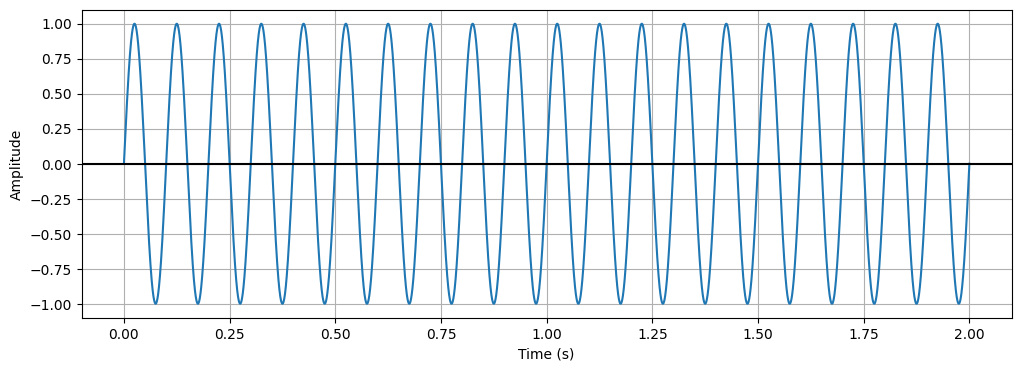

In [29]:
# Set the parameters
frequency = 10 # Hz
duration = 2 # seconds
sampling_frequency = 10000 # Hz 
t = np.linspace(0, duration, int(sampling_frequency * duration)) # Generate the time samples using np.linspace()
sine_wave = np.sin(2*np.pi*frequency*t) ## Generate the sine wave using np.sin()


# Plot the waveform using plt.plot()
plt.figure(figsize=(12,4))
plt.plot(t, sine_wave)

# Label the plot axes
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

# Show the plot
plt.show()

### Task 2. Create a Python script that applies a low-pass filter to the sine wave generated in task 1. The cutoff frequency of the low-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.

In [ ]:
# Use a Buttworth filter for your lowpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'low', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

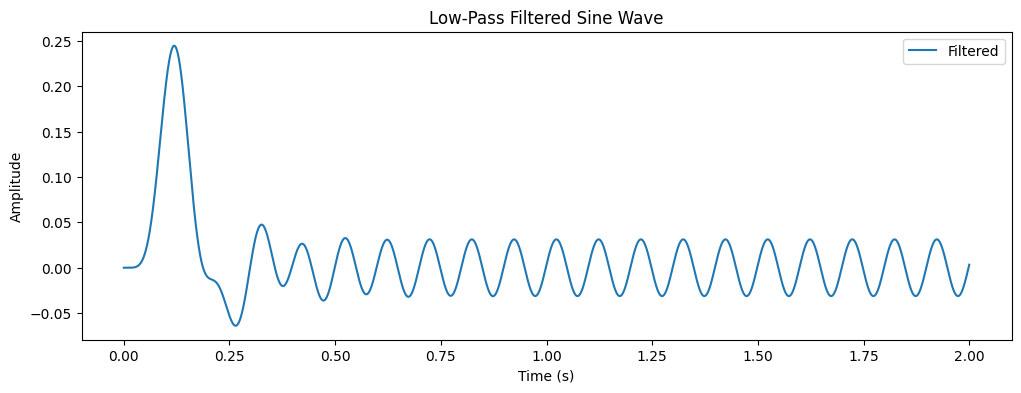

In [32]:
# Filter the sine wave
cutoff = 5 # Hz
order = 5
nyquist_frequency = sampling_frequency/2
b, a = sig.butter(order, cutoff / nyquist_frequency, btype='low')
low_pass_sine_wave = sig.lfilter(b, a, sine_wave)

# Plot the filtered waveform
plt.figure(figsize=(12,4))
plt.plot(t, low_pass_sine_wave, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtered Sine Wave')
plt.legend()
plt.show()

### Task 3. Create a Python script that applies a high-pass filter to the sine wave generated in task 1. The cutoff frequency of the high-pass filter should be 500 Hz. Plot the filtered waveform using the matplotlib library.



In [ ]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

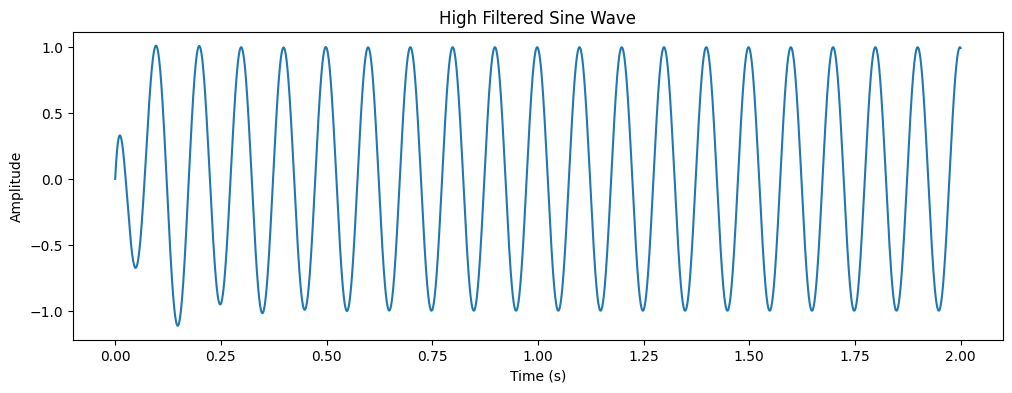

In [33]:
# Filter the sine wave
cutoff = 5 # Hz
order = 5
b, a = sig.butter(order, cutoff / nyquist_frequency, btype='highpass')

high_sine = sig.lfilter(b, a, sine_wave)

# Plot the filtered waveform
plt.figure(figsize=(12,4))
plt.plot(t, high_sine, label='Filtered')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('High Filtered Sine Wave')
plt.show()

### Task 4. Create a Python script that applies a band-pass filter to the sine wave generated in task 1. The cutoff frequencies of the band-pass filter should be 400 Hz and 600 Hz. Plot the filtered waveform using the matplotlib library.

In [34]:
# Use a Buttworth filter for your highpass filter. ex. b, a = sig.butter(Order, cutoff, btype = 'highpass', fs = sampleFrequency)
# Order input argument can be between 1-300 (ideally 1-10)
# Make sure to read on how to input two critical frequencies 
# Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# Use sig.lfilt() to filter the sine wave. ex. y = sig.lfilt(b, a, x)
# Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
# Finally, use plt.plot() to plot the filtered waveform.

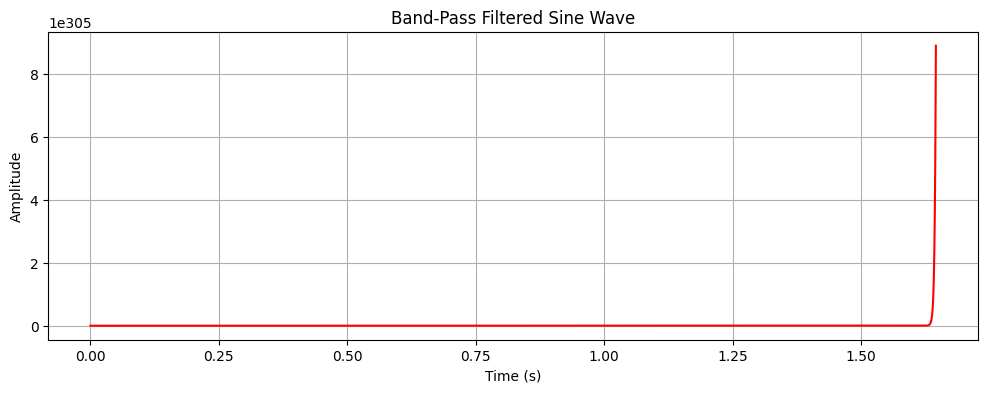

In [35]:
# Define the filter parameters
lowcut = 4
highcut = 6
order = 5
b, a = sig.butter(order, [lowcut, highcut], btype='bandpass', fs=sampling_frequency)

# Apply the band-pass filter
band_pass_wave = sig.lfilter(b, a, sine_wave)

# Plot the filtered waveform
plt.figure(figsize=(12,4))
plt.plot(t, band_pass_wave, 'r')
plt.title("Band-Pass Filtered Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Task 5. Create a Python script that performs convolution of the sine wave generated in task 1 with a rectangular window of length 100 samples. Plot the convolved signal using the matplotlib library.

In [ ]:
# Suggestion: Create a rectangular window of length 100 samples using the np.ones() function. 
# Then use the convolve() function from numpy to perform the convolution.
# Finally, use plt.plot() to plot the convolved signal.

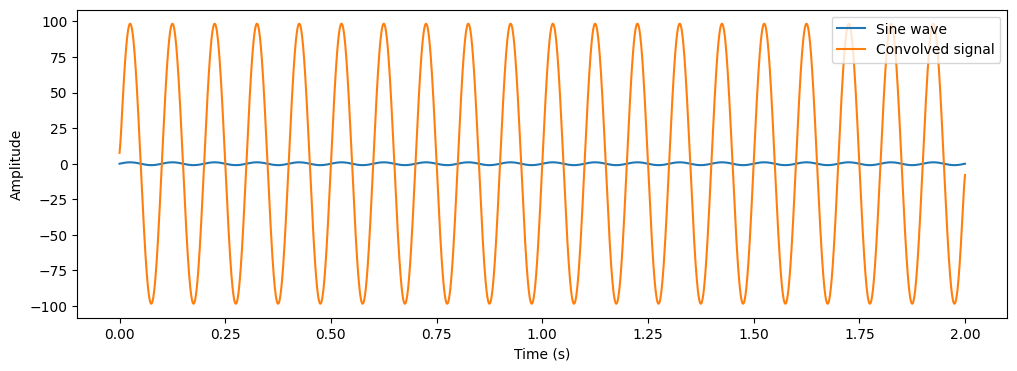

In [37]:
# Define the rectangular window
window_length = 100  # Window length in samples
rectangular_window = np.ones(window_length)

# Perform convolution
convolved_signal = np.convolve(sine_wave, rectangular_window, mode='same')

# Plot the signals
plt.figure(figsize=(12,4))
plt.plot(t, sine_wave, label='Sine wave')
# plt.plot(t, rectangular_window, label='Sine wave')
plt.plot(t, convolved_signal, label='Convolved signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### Task 6. Create a Python script that performs moving average of the sine wave generated in task 1 with a window of length 10 samples. Plot the filtered signal using the matplotlib library.

In [ ]:
# Suggestion: Use the numpy function np.convolve() with mode='valid' to perform the moving average.
# Can also be accomplished with for/while loop
# Then use plt.plot() to plot the filtered signal.

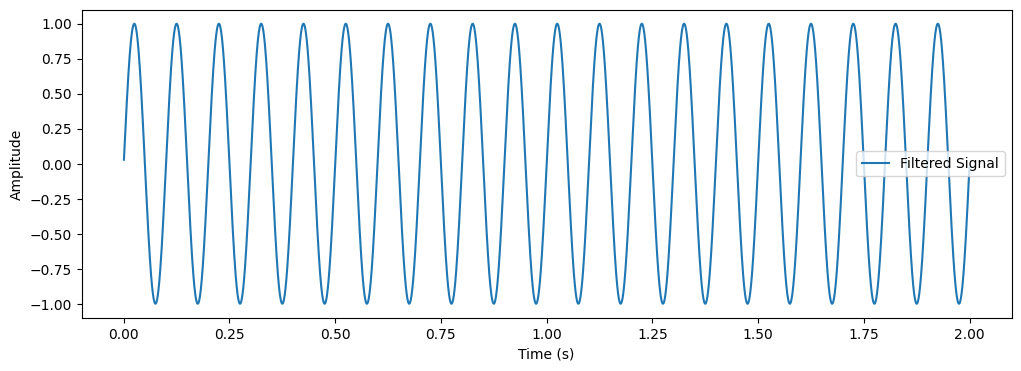

In [38]:
# Perform moving average on the sine wave
window_length = 10
weights = np.ones(window_length) / window_length
filtered_signal = np.convolve(sine_wave, weights, mode='valid')

# Plot the original sine wave and the filtered signal
plt.figure(figsize=(12,4))
# plt.plot(t, sine_wave, label='Original Sine Wave')
plt.plot(t[window_length//2:-window_length//2+1], filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

### 7. Compare the filtered waveforms obtained in tasks 2, 3, 4, 5 and 6 with the original waveform generated in task 1. Write a a few paragraphs in your notebook explaining the results obtained and the implications of each filter/operation type on the signal.

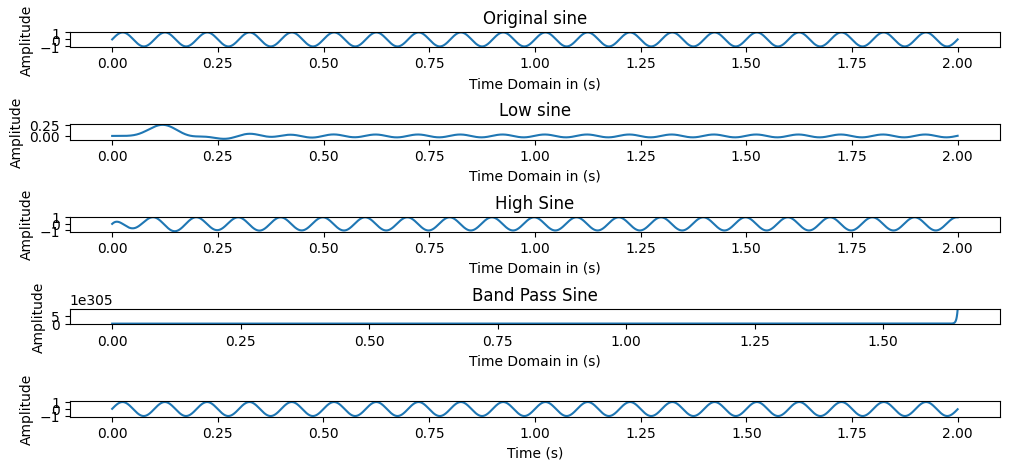

In [60]:
plt.figure(figsize=(12,5))

plt.subplot(5, 1, 1)
plt.plot(t, sine_wave)
plt.xlabel('Time Domain in (s)')
plt.ylabel('Amplitude')
plt.title('Original sine')

plt.subplot(5, 1, 2)
plt.plot(t, low_pass_sine_wave)
plt.xlabel('Time Domain in (s)')
plt.ylabel('Amplitude')
plt.title('Low sine')

plt.subplot(5, 1, 3)
plt.plot(t, high_sine)
plt.xlabel('Time Domain in (s)')
plt.ylabel('Amplitude')
plt.title('High Sine')

plt.subplot(5, 1, 4)
plt.plot(t, band_pass_wave)
plt.xlabel('Time Domain in (s)')
plt.ylabel('Amplitude')
plt.title('Band Pass Sine')

plt.subplot(5, 1, 5)
plt.plot(t[window_length//2:-window_length//2+1], filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplots_adjust(hspace=5)
plt.show()

Lowpass, highpass, and bandpass filters are used to manipulate signals in different ways, depending on the desired outcome. Lowpass filters are designed to pass low frequency signals and reject high frequency signals. This means that when a lowpass filter is applied to a signal, the high frequency components of the signal will be reduced, resulting in a smoothing effect. On the other hand, highpass filters are designed to pass high frequency signals and reject low frequency signals. When a highpass filter is applied to a signal, the low frequency components of the signal will be reduced, resulting in a sharper or more pronounced signal.

Bandpass filters, as the name suggests, pass signals within a specific frequency range while rejecting signals outside that range. When a bandpass filter is applied to a signal, only the components of the signal that are within the defined frequency range will be allowed through, resulting in a signal with a specific frequency range emphasized.

Rectangular windows are used in signal processing to create a smooth transition between the signal and zero. This can be useful for reducing spectral leakage, which occurs when a finite length signal is transformed into the frequency domain. When a rectangular window is applied to a signal, the sudden transition from the signal to zero can cause the spectral components of the signal to spread, leading to spectral leakage. By using a rectangular window, the transition between the signal and zero is made smoother, reducing spectral leakage and improving the accuracy of the signal in the frequency domain.

## Part 2: Advanced DSP Applications in Python

### Task 1. Create a Python script that generates a signal that is a sum of two sine waves with different frequencies and amplitudes. The first sine wave should have a frequency of 1000 Hz and an amplitude of 1, the second sine wave should have a frequency of 2000 Hz and an amplitude of 0.5. Plot the waveform using the matplotlib library.

In [ ]:
# Suggestions:
# - Use the numpy library's sine function to generate the sine waves
# - Use the numpy library's arange function to create an array of time values
# - Use the matplotlib library's plot function to plot the waveform

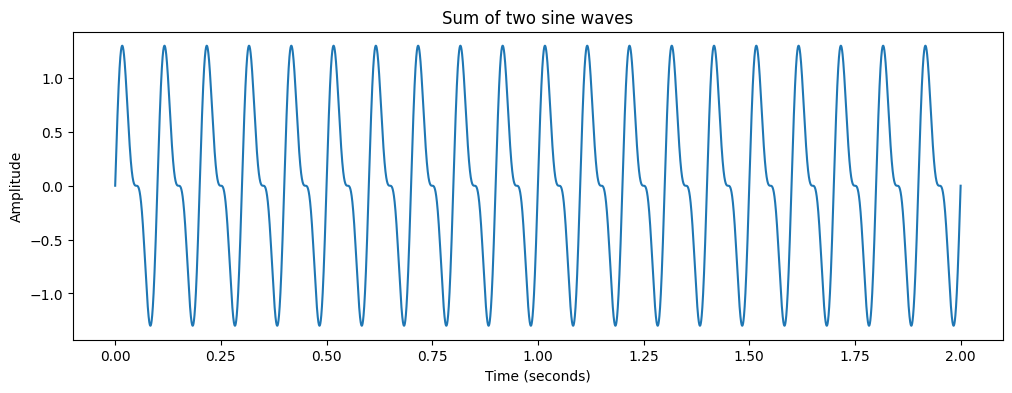

In [39]:
# Define the parameters for the two sine waves
frequency1 = 10 # Hz
amplitude1 = 1
frequency2 = 20 # Hz
amplitude2 = 0.5

# Define the time range for the signal
start_time = 0 # seconds
end_time = 2 # seconds
sampling_frequency = 10000 # Hz
time = np.linspace(start_time, end_time, int(sampling_frequency*(end_time-start_time)))

# Generate the first sine wave
sine_wave1 = amplitude1 * np.sin(2 * np.pi * frequency1 * time)

# Generate the second sine wave
sine_wave2 = amplitude2 * np.sin(2 * np.pi * frequency2 * time)

# Sum the two sine waves to get the final signal
combined_signal = sine_wave1 + sine_wave2

# Plot the waveform
plt.figure(figsize=(12,4))
plt.plot(time, combined_signal)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sum of two sine waves')
plt.show()

### Task 2. Create a Python script that applies a Butterworth filter to the signal generated in task 1. The cutoff frequency of the filter should be 1500 Hz and the filter order should be 4. Plot the filtered waveform using the matplotlib library.

In [ ]:
# Suggestions:
# - Use the scipy library's signal butter function to generate the Butterworth filter
# - Use the scipy library's lfilter function to apply the filter to the signal
# - Use the matplotlib library's plot function to plot the filtered waveform
# - Documentation for sig.butter: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
# - Documentation for sig.lfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

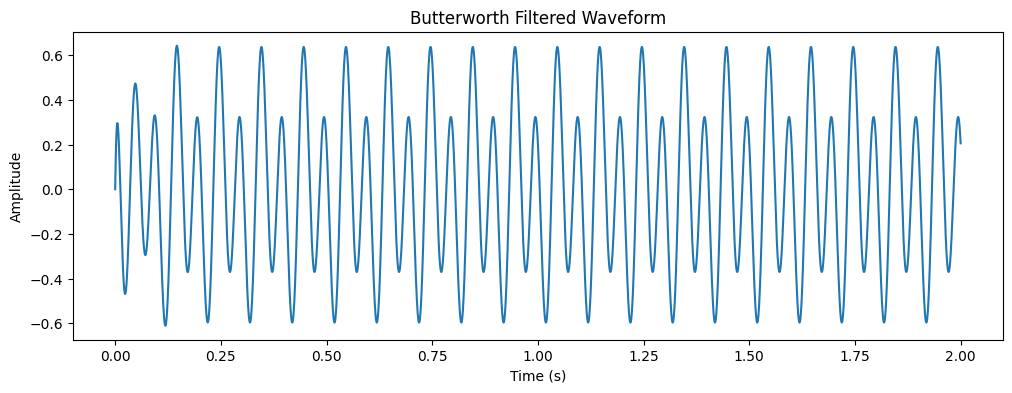

In [40]:
# Apply a Butterworth filter to the signal
cutoff_frequency = 15
filter_order = 4
b, a = sig.butter(filter_order, cutoff_frequency / (sampling_frequency/2), btype='high')
butter_signal = sig.lfilter(b, a, combined_signal)

# Plot the filtered waveform
plt.figure(figsize=(12,4))
plt.plot(t, butter_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Butterworth Filtered Waveform')
plt.show()

### Task 3. Create a Python script that computes the Fast Fourier Transform (FFT) of the signal generated in task 1. Plot the magnitude and phase of the FFT using the matplotlib library.

In [ ]:
# Use the fft function to get the Fourier Transform of the sine wave. ex. X = fft(x)
# Documentation for fft: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html
# To get the magnitude of the fft use np.abs(). ex. mag = np.abs(X)
# To get the phase of the fft use np.angle(). ex. phase = np.angle(X)
# Additionally, you can use fftfreq to get the independent axis for your plots. ex. freq = fftfreq(len(X), 1/fs)
# Documentation for fftfreq: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html

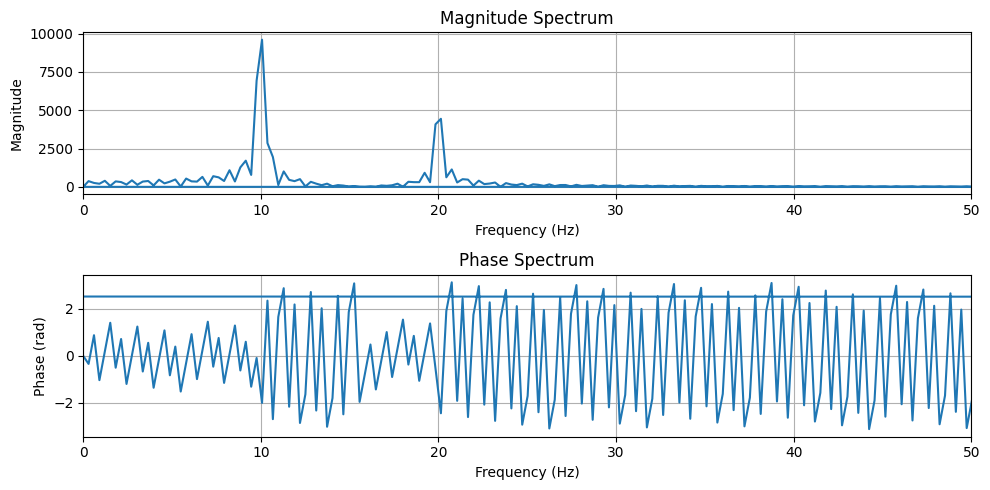

In [41]:
# Compute FFT
N = 2**15
fft = np.fft.fft(combined_signal, n=N)
magnitude = np.abs(fft) # magnitude spectrum
phase = np.angle(fft) # phase spectrum
f = np.fft.fftfreq(N, d = 1/sampling_frequency) # frequencies

# Plot magnitude and phase
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(f, magnitude)
plt.xlim(0,50)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Magnitude Spectrum")
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(f, phase)
plt.xlim(0,50)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")
plt.title("Phase Spectrum")
plt.grid()
plt.tight_layout()
plt.show()